In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df.shape

(400, 11)

In [6]:
# categorizing the sales data
for index in range(df.Sales.shape[0]):
  if df['Sales'][index] >= 0 and df['Sales'][index]  <= 5 :
    df['Sales'][index]  = 'bad'
  elif df['Sales'][index]  >= 6 and df['Sales'][index]  <= 10 :
    df['Sales'][index]  = 'medium'
  else :
    df['Sales'][index]  = 'good' 
  

<ipython-input-6-b220b0536257>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'][index]  = 'medium'


In [7]:
df.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,good,111,48,16,260,83,Good,65,10,Yes,Yes
2,good,113,35,10,269,80,Medium,59,12,Yes,Yes
3,medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,bad,141,64,3,340,128,Bad,38,13,Yes,No


In [8]:
df['Sales'].value_counts()

medium    192
good      131
bad        77
Name: Sales, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Sales'] = lb.fit_transform(df['Sales'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,2,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,Good,33,14,Yes,Yes
396,2,139,23,3,37,120,Medium,55,11,No,Yes
397,2,162,26,12,368,159,Medium,40,18,Yes,Yes
398,1,100,79,7,284,95,Bad,50,12,Yes,Yes


In [10]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.287500,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,0.768975,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,1.000000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,1.000000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,2.000000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,2.000000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<Axes: ylabel='Income'>

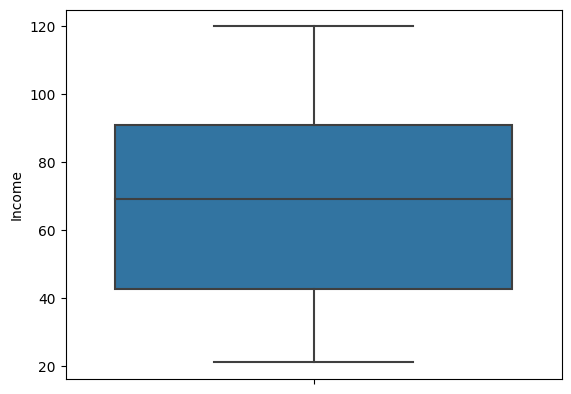

In [11]:
sns.boxplot(y=df['Income'])

In [12]:
(df['Sales'].value_counts()/df['Sales'].count())*100

2    48.00
1    32.75
0    19.25
Name: Sales, dtype: float64

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sales        400 non-null    int64 
 1   CompPrice    400 non-null    int64 
 2   Income       400 non-null    int64 
 3   Advertising  400 non-null    int64 
 4   Population   400 non-null    int64 
 5   Price        400 non-null    int64 
 6   ShelveLoc    400 non-null    object
 7   Age          400 non-null    int64 
 8   Education    400 non-null    int64 
 9   Urban        400 non-null    object
 10  US           400 non-null    object
dtypes: int64(8), object(3)
memory usage: 34.5+ KB


In [14]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [15]:
df.nunique()

Sales            3
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

<Axes: >

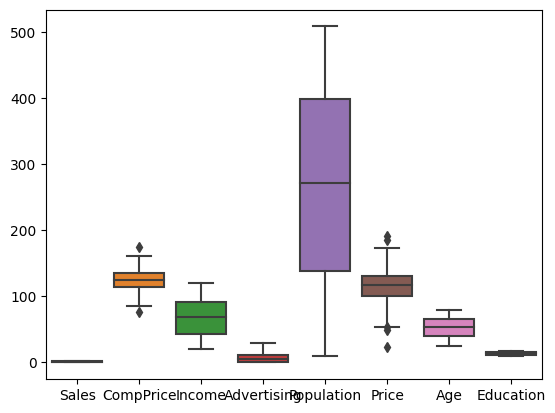

In [16]:
sns.boxplot(df)

In [17]:
df.corr()

<ipython-input-17-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.049283,0.042553,0.102415,-0.032677,-0.162630,-0.093568,0.035446
CompPrice,0.049283,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.042553,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.102415,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,-0.032677,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.162630,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.093568,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,0.035446,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<Axes: xlabel='Sales', ylabel='Advertising'>

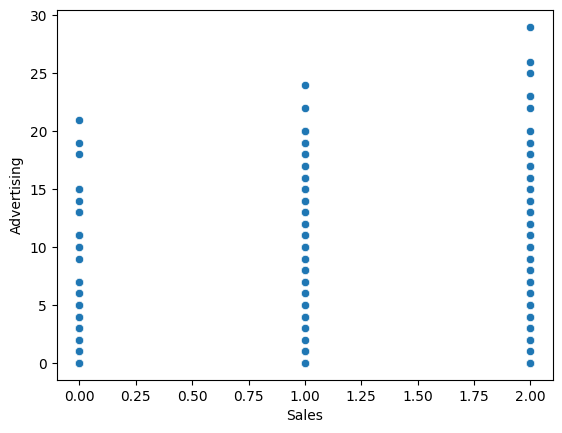

In [18]:
sns.scatterplot(x=df['Sales'],y=df['Advertising'])

<ipython-input-19-e1a241f9c162>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Advertising'])


<Axes: xlabel='Advertising', ylabel='Density'>

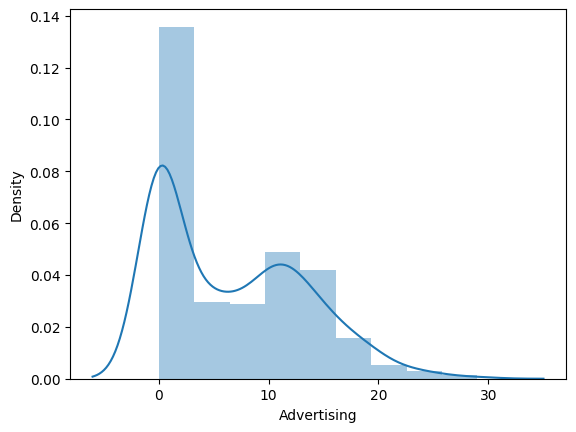

In [19]:
sns.distplot(df['Advertising'])

In [20]:
# df['Sales'] = len(df['Sales']) .value_counts()
# len(df['Sales'])
(df['Sales'].value_counts()/df['Sales'].count())*100


2    48.00
1    32.75
0    19.25
Name: Sales, dtype: float64

<Axes: xlabel='Sales', ylabel='count'>

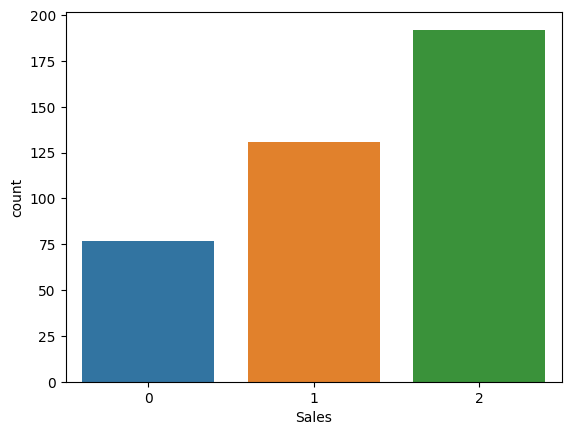

In [21]:
sns.countplot(x=df['Sales'])

In [22]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,2,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No


In [23]:
col = ['Urban','US','ShelveLoc']
df[col] = df[col].apply(lb.fit_transform)

In [24]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.049283,0.042553,0.102415,-0.032677,-0.162630,0.244938,-0.093568,0.035446,-0.014811,0.012415
CompPrice,0.049283,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.042553,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.102415,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,-0.032677,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.162630,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.244938,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.093568,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,0.035446,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.014811,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


In [25]:
X = df.iloc[:,1:]
y = df.iloc[:,0]


In [26]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)

In [27]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({2: 192, 1: 131, 0: 77})
Resample dataset shape Counter({2: 192, 1: 192, 0: 192})


In [28]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)
k_fold = KFold(n_splits=15,shuffle=True,random_state=123)


In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy',max_depth=20)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20)

In [50]:
acc_score = cross_val_score(classifier,x_smote,y_smote,cv=k_fold)
acc_score.mean()

0.7361223571749886

In [52]:
classifier.score(X_train,y_train)

1.0

In [53]:
classifier.score(X_test,y_test)

0.5375

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = classifier.predict(X_test)


confusion_matrix(y_test,y_pred)

array([[ 3,  2,  7],
       [ 2,  5, 21],
       [ 0,  8, 32]])

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.25      0.35        12
           1       0.33      0.18      0.23        28
           2       0.53      0.80      0.64        40

    accuracy                           0.50        80
   macro avg       0.49      0.41      0.41        80
weighted avg       0.47      0.50      0.45        80



In [36]:
accuracy_score(y_test,y_pred)

0.5